# Network Biology Assignment - 2
---

## Imports

In [1]:
from Bio import PDB
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

## Answer 1

In [2]:
class Gene:
    def __init__(self, gene_id, tfbs_count):
        self.gene_id = gene_id
        self.tfbs_count = tfbs_count

class TFBS:
    def __init__(self, tfbs_id):
        self.tfbs_id = tfbs_id

class EvolutionaryModel:
    def __init__(self, gene_count, tfbs_count, initial_genes):
        self.gene_count = gene_count
        self.tfbs_count = tfbs_count
        self.genes = initial_genes
        self.tfbs = [TFBS(i) for i in range(tfbs_count)]
        self.coexpression_network = nx.Graph()

    def duplicate_gene(self, gene_id):
        duplicated_gene = Gene(len(self.genes), self.genes[gene_id].tfbs_count)
        self.genes.append(duplicated_gene)

    def delete_gene(self, gene_id):
        del self.genes[gene_id]

    def duplicate_tfbs(self, gene_id):
        if self.genes[gene_id].tfbs_count < self.tfbs_count:
            tfbs_id = random.choice(range(self.tfbs_count))
            self.genes[gene_id].tfbs_count += 1


    def delete_tfbs(self, gene_id):
        if self.genes[gene_id].tfbs_count > 1:
            tfbs_id = random.choice(range(self.tfbs_count))
            self.genes[gene_id].tfbs_count -= 1

    def evolve(self, steps, duplicate_gene_prob, delete_gene_prob, duplicate_tfbs_prob, delete_tfbs_prob):
        events = ['duplicate_gene', 'delete_gene', 'duplicate_tfbs', 'delete_tfbs']
        probabilities = [duplicate_gene_prob, delete_gene_prob, duplicate_tfbs_prob, delete_tfbs_prob]

        for _ in range(steps):
            event = random.choices(events, probabilities)[0]

            if event == 'duplicate_gene' and len(self.genes) < self.gene_count * 2:
                gene_id = random.choice(range(len(self.genes)))
                self.duplicate_gene(gene_id)
            elif event == 'delete_gene' and len(self.genes) > 1:
                gene_id = random.choice(range(len(self.genes)))
                self.delete_gene(gene_id)
            elif event == 'duplicate_tfbs':
                gene_id = random.choice(range(len(self.genes)))
                self.duplicate_tfbs(gene_id)
            elif event == 'delete_tfbs':
                gene_id = random.choice(range(len(self.genes)))
                self.delete_tfbs(gene_id)

    def construct_coexpression_network(self):
        for gene1 in self.genes:
            for gene2 in self.genes:
                if gene1 != gene2:
                    shared_tfbs = set(range(self.tfbs_count)) & set(range(self.tfbs_count))
                    if shared_tfbs:
                        self.coexpression_network.add_edge(gene1.gene_id, gene2.gene_id)

    def visualize_coexpression_network(self):
        nx.write_gml(self.coexpression_network, "coexpression_network.gml")
        nx.draw(self.coexpression_network, with_labels=True)
        plt.title("Coexpression Network")
        plt.show()
        
    def get_degree_distribution(self):
        return dict(self.coexpression_network.degree())

    def visualize_degree_distribution(self, degree_distribution, title):
        plt.bar(degree_distribution.keys(), degree_distribution.values())
        plt.title(title)
        plt.xlabel('Node Degree')
        plt.ylabel('Frequency')
        plt.show()

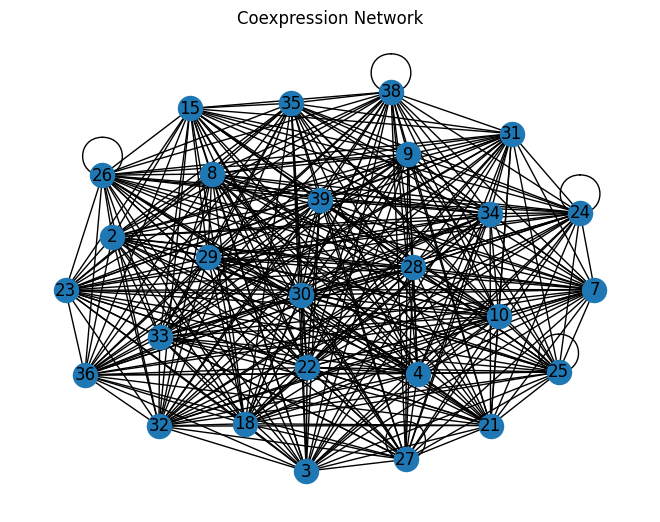

In [3]:
gene_count = 25
tfbs_count = 10
initial_genes = [Gene(i, 3) for i in range(gene_count)]

evolution_model = EvolutionaryModel(gene_count, tfbs_count, initial_genes)

# Probabilities
evolution_model.evolve(100, 0.30, 0.20, 0.30, 0.20)

evolution_model.construct_coexpression_network()
evolution_model.visualize_coexpression_network()

### Degree Distribution

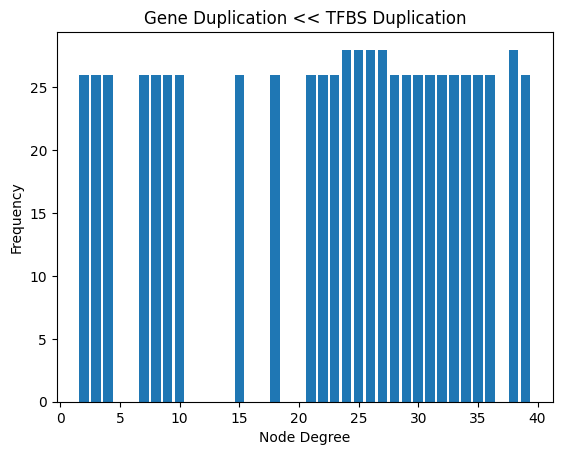

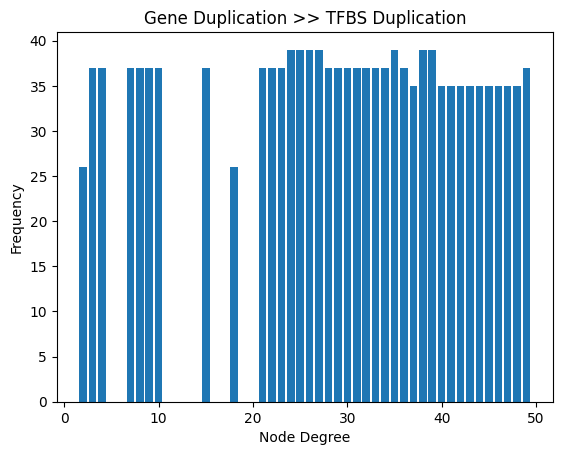

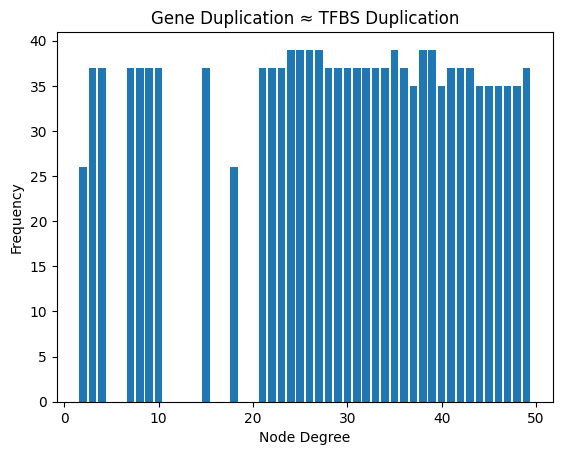

In [4]:
# Case 1: Gene Duplication << TFBS Duplication
evolution_model.evolve(100, 0.02, 0.04, 0.9, 0.04)
evolution_model.construct_coexpression_network()
degree_distribution = evolution_model.get_degree_distribution()
evolution_model.visualize_degree_distribution(degree_distribution, 'Gene Duplication << TFBS Duplication')

# Case 2: Gene Duplication >> TFBS Duplication
evolution_model.evolve(100, 0.9, 0.04, 0.02, 0.04)
evolution_model.construct_coexpression_network()
degree_distribution = evolution_model.get_degree_distribution()
evolution_model.visualize_degree_distribution(degree_distribution, 'Gene Duplication >> TFBS Duplication')

# Case 3: Gene Duplication ≈ TFBS Duplication
evolution_model.evolve(100, 0.25, 0.25, 0.25, 0.25)
evolution_model.construct_coexpression_network()
degree_distribution = evolution_model.get_degree_distribution()
evolution_model.visualize_degree_distribution(degree_distribution, 'Gene Duplication ≈ TFBS Duplication')

### Explanation for the above observations

The coexpression network built in this evolutionary model represents relationships between genes based on the shared transcription factor binding sites (TFBS). In the context of the evolutionary model, where gene and TFBS duplication and deletion events occur, the coexpression network reflects the regulatory interactions between genes that have evolved over time.

Concluding statements from the coexpression network analysis can provide insights into the impact of evolutionary events on the regulatory relationships between genes. Here are some possible conclusions you could draw from the coexpression network:

- **Impact of Gene Duplication**: If gene duplication events are prevalent, you may observe clusters of nodes in the coexpression network, where duplicated genes are likely to coexpress due to the similarity in their regulatory regions.

- **Impact of TFBS Duplication**: Similarly, if TFBS duplication events dominate, you might observe a network where genes with duplicated TFBS are more likely to coexpress, indicating that these duplicated binding sites contribute to regulatory similarities.

- **Trade-off Between Gene Duplication and TFBS Duplication**: If there is a balance between gene and TFBS duplication, the coexpression network may exhibit a mix of clusters and connections, suggesting a complex interplay between gene duplication and the conservation of regulatory elements.

- **Functional Modules**: The presence of tightly connected sub-networks or modules in the coexpression network may suggest the existence of functional groups of genes that coordinate their expression due to shared regulatory elements.

- **Robustness and Sensitivity**: The overall structure of the coexpression network can provide insights into the robustness or sensitivity of the regulatory network to genetic and regulatory changes. Highly connected nodes may represent genes that play central roles in the regulatory network.

- **Evolutionary Dynamics**: Changes in the network structure over the course of evolution can be analyzed to understand how the regulatory relationships between genes evolve. For example, you might observe the emergence of new coexpression patterns or the loss of previously existing ones.

## Answer 2

In [5]:
def extract_coordinates(pdb_file):
    parser = PDB.PDBParser(QUIET=True)
    structure = parser.get_structure('protein', pdb_file)
    coordinates = {}
    for model in structure:
        for chain in model:
            for residue in chain:
                for atom in residue:
                    if atom.name == 'CA':
                        coordinates[residue.id[1]] = atom.coord
    return coordinates

def calculate_distance(coord1, coord2):
    return sum((c1 - c2) ** 2 for c1, c2 in zip(coord1, coord2)) ** 0.5

def create_rig_model(coordinates, cutoff):
    rig_graph = nx.Graph()
    for res1, coord1 in coordinates.items():
        for res2, coord2 in coordinates.items():
            if res1 != res2 and calculate_distance(coord1, coord2) <= cutoff:
                rig_graph.add_edge(res1, res2)
    return rig_graph

def create_lin_model(rig_graph, threshold):
    lin_graph = nx.Graph()
    for node1, neighbors in rig_graph.adjacency():
        for node2 in neighbors:
            if abs(node1 - node2) > threshold:
                lin_graph.add_edge(node1, node2)
    return lin_graph


In [6]:
import os

pdb_ids = ["1hrc", "1imq", "1ycc", "2abd", "2pdd"]
save_path = "pdb_files/"
rig_folder = "rig/"
lin_folder = "lin/"

os.makedirs(rig_folder, exist_ok = True)
os.makedirs(lin_folder, exist_ok = True)

for pdb_id in pdb_ids:
    
    pdb_file = save_path + pdb_id + ".pdb"
    coordinates = extract_coordinates(pdb_file)
    
    rig_model = create_rig_model(coordinates, cutoff = 7)
    rig_file_path = os.path.join(rig_folder, f"{pdb_id}_rig.adjlist")
    nx.write_adjlist(rig_model, rig_file_path)

    lin_model = create_lin_model(rig_model, threshold = 12)
    lin_file_path = os.path.join(lin_folder, f"{pdb_id}_lin.adjlist")
    nx.write_adjlist(lin_model, lin_file_path)

In [7]:
import pandas as pd

def compute_network_properties(graph):
    if not nx.is_connected(graph):
        connected_components = list(nx.connected_components(graph))
        largest_component = max(connected_components, key=len)
        subgraph = graph.subgraph(largest_component)
    else:
        subgraph = graph

    L = nx.average_shortest_path_length(subgraph)
    C = nx.average_clustering(subgraph)
    return L, C

In [8]:
pdb_ids = ["1hrc", "1imq", "1ycc", "2abd", "2pdd"]
save_path = "pdb_files/"
rig_folder = "rig/"
lin_folder = "lin/"

records = []

for pdb_id in pdb_ids:
 
    rig_file_path = os.path.join(rig_folder, f"{pdb_id}_rig.adjlist")
    rig_model = nx.read_adjlist(rig_file_path)

    lin_file_path = os.path.join(lin_folder, f"{pdb_id}_lin.adjlist")
    lin_model = nx.read_adjlist(lin_file_path)

    rig_L, rig_C = compute_network_properties(rig_model)

    lin_L, lin_C = compute_network_properties(lin_model)

    records.append({
        'Protein': pdb_id,
        'RIG_L': rig_L,
        'RIG_C': rig_C,
        'LIN_L': lin_L,
        'LIN_C': lin_C
    })

results = pd.DataFrame.from_dict(records)

### Characteristic Path Length (L) and Clustering Coefficients (C) of both RIG and LIN models

In [9]:
results

,Protein,RIG_L,RIG_C,LIN_L,LIN_C
0,1hrc,3.914862,0.566917,5.291667,0.022222
1,1imq,3.447606,0.580363,5.570571,0.000000
2,1ycc,4.025095,0.564257,3.390476,0.000000
3,2abd,3.708345,0.561989,6.627197,0.000000
4,2pdd,2.709856,0.596637,2.066667,0.000000


### Observations about Topological Properties and Expected Rate of Folding

#### 1. Characteristic Path Length (L):

- A lower characteristic path length (L) indicates a more efficient communication network.
- If LIN models have a lower L compared to RIG models, it suggests that long-range interactions in LIN models may facilitate faster information transfer between residues during folding.
- However, it's essential to consider the specific values of L for each protein to draw conclusions about the efficiency of the folding process.

#### 2. Clustering Coefficient (C):

- A higher clustering coefficient (C) indicates a higher degree of local clustering.
- If RIG models have a higher C compared to LIN models, it implies that residue interactions in RIG models are more locally clustered, possibly reflecting a higher degree of cooperativity in the folding process.
- High local clustering can indicate the presence of structural motifs and cooperative interactions during folding.

#### 3. Graph Connectivity:

- The warning about a graph not being connected for some proteins suggests that certain residues may not have interactions with the rest of the protein.
- Analyzing the largest connected component provides insights into the most interconnected part of the protein structure.

#### 4. Expected Rate of Folding:

- Efficient communication (low L) and high local clustering (high C) are generally associated with faster folding processes.
- The specific topological properties influencing the rate of folding can vary for different proteins based on their unique structural characteristics.

#### 5. Protein-Specific Considerations:

- Interpretation of topological properties should be protein-specific. Each protein may have a unique folding mechanism influenced by its amino acid sequence, structural motifs, and the nature of interactions.
- Experimentally observed folding rates and thermodynamic stability should be considered to validate or complement the network analysis.

In summary, while the network analysis provides valuable insights into the topological properties of protein folding models, the interpretation should be cautious and protein-specific. Experimental validation and considering the biological context are crucial for a comprehensive understanding of the folding dynamics.


## Answer 3

In [10]:
def generate_bartoli_model(original_rig, num_links):
    n = len(original_rig.nodes)
    bartoli_model = np.zeros((n, n), dtype = int)

    # Creating the backbone of the Bartoli model
    np.fill_diagonal(bartoli_model, 1)
    np.fill_diagonal(np.fliplr(bartoli_model), 1)

    # Iterating until no of links in the random graph is close to the original
    current_links = 0
    while current_links < num_links:
        # Randomnly selecting a pair of residues with linearly decreasing probability
        prob_matrix = np.triu(np.ones((n, n), dtype = float), k = 1)
        prob_matrix /= prob_matrix.sum()
        flat_prob_matrix = prob_matrix[np.triu_indices(n, k = 1)]
        index = np.random.choice(len(flat_prob_matrix), p=flat_prob_matrix)
        i, j = np.unravel_index(index, (n - 1, n))
        i, j = min(i, j), max(i, j)

        # Assigning 1s to the entries of the adjacency matrix
        for di in [-1, 0, 1]:
            for dj in [-1, 0, 1]:
                ni, nj = i + di, j + dj
                if 0 <= ni < n and 0 <= nj < n:
                    bartoli_model[ni, nj] = 1

        current_links = np.sum(bartoli_model) // 2

    return bartoli_model

def plot_bartoli_model(rig_edges, bartoli_edges):
    plt.scatter(np.arange(len(rig_edges)), rig_edges[:, 1] - rig_edges[:, 0], label = 'Original RIG')
    plt.scatter(np.arange(len(bartoli_edges)), bartoli_edges[:, 1] - bartoli_edges[:, 0], label = "Bartoli's Model")
    plt.xlabel('Number of Amino Acid Contacts Made')
    plt.ylabel('Cartesian Distance Between Them')
    plt.legend()
    plt.title(f'Contact Map for Protein {pdb_id}')
    plt.show()    

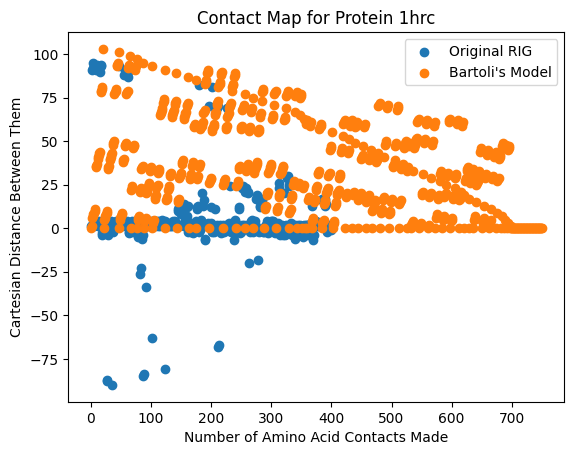

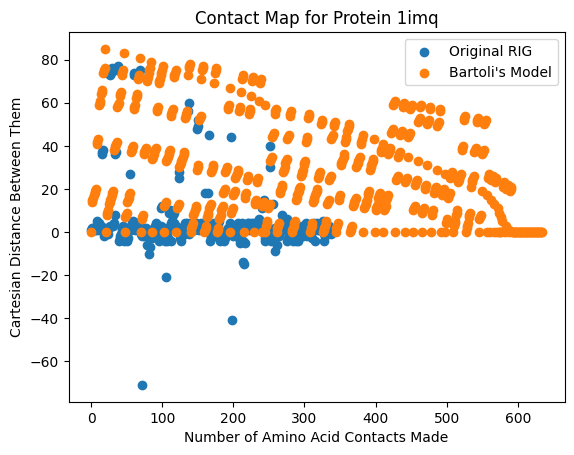

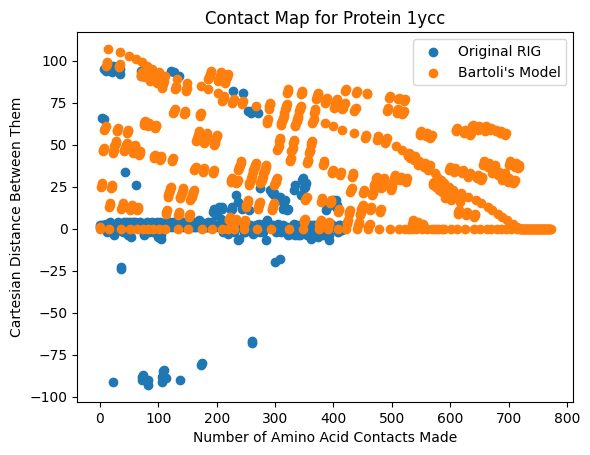

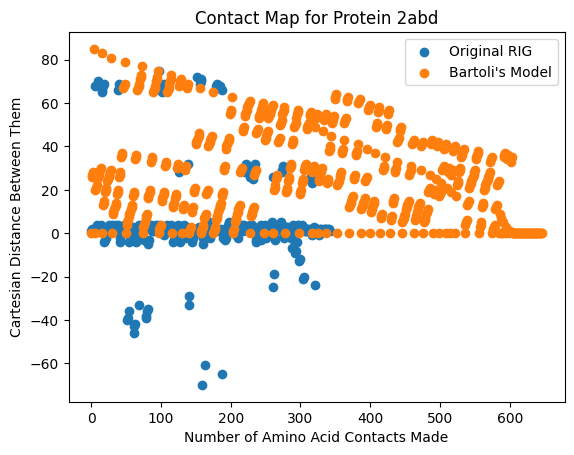

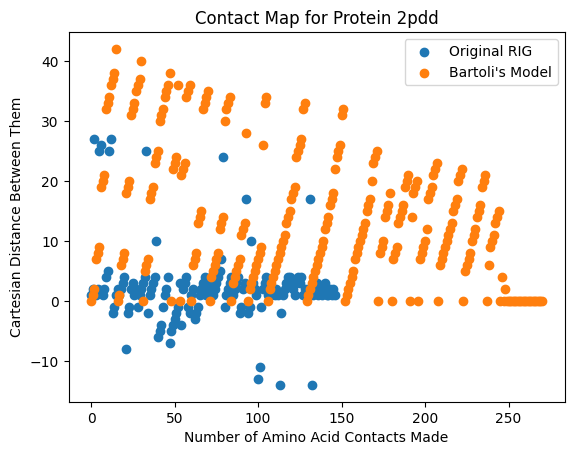

In [11]:
records = []

for pdb_id in pdb_ids:

    rig_file_path = os.path.join(rig_folder, f"{pdb_id}_rig.adjlist")
    rig_model = nx.read_adjlist(rig_file_path)

    lin_file_path = os.path.join(lin_folder, f"{pdb_id}_lin.adjlist")
    lin_model = nx.read_adjlist(lin_file_path)

    rig_L, rig_C = compute_network_properties(rig_model)

    lin_L, lin_C = compute_network_properties(lin_model)

    num_links_rig = len(rig_model.edges())
    bartoli_model = generate_bartoli_model(rig_model, num_links_rig)

    bartoli_graph = nx.Graph(bartoli_model)

    bartoli_L, bartoli_C = compute_network_properties(bartoli_graph)
    
    records.append({
        'Protein': pdb_id,
        'RIG_L': rig_L,
        'RIG_C': rig_C,
        'LIN_L': lin_L,
        'LIN_C': lin_C,
        'Bartoli_L': bartoli_L,
        'Bartoli_C': bartoli_C
    })
    
    rig_edges = np.array([tuple(map(int, edge)) for edge in rig_model.edges()])
    bartoli_edges = np.array([tuple(map(int, edge)) for edge in bartoli_graph.edges()])
    plot_bartoli_model(rig_edges, bartoli_edges)

In [12]:
results = pd.DataFrame.from_dict(records)
results

,Protein,RIG_L,RIG_C,LIN_L,LIN_C,Bartoli_L,Bartoli_C
0,1hrc,3.914862,0.566917,5.291667,0.022222,2.279500,0.155920
1,1imq,3.447606,0.580363,5.570571,0.000000,2.183858,0.209732
2,1ycc,4.025095,0.564257,3.390476,0.000000,2.273105,0.125922
3,2abd,3.708345,0.561989,6.627197,0.000000,2.129138,0.183898
4,2pdd,2.709856,0.596637,2.066667,0.000000,1.901440,0.291060


### Modifications to Bartoli Model

In [13]:
def calculate_distance_dependent_probability(n, coordinates, distance_decay_factor):
    prob_matrix = np.zeros((n, n), dtype=float)
    for i in range(n):
        for j in range(i + 1, n):
            if i in coordinates and j in coordinates:
                distance = np.linalg.norm(coordinates[i] - coordinates[j])
                prob_matrix[i, j] = prob_matrix[j, i] = np.exp(-distance_decay_factor * distance)
    return prob_matrix


def generate_bartoli_model_modified(original_rig, num_links, coordinates, distance_decay_factor=0.9):
    n = len(original_rig.nodes)
    bartoli_model = np.zeros((n, n), dtype=int)

    np.fill_diagonal(bartoli_model, 1)
    np.fill_diagonal(np.fliplr(bartoli_model), 1)

    current_links = 0
    while current_links < num_links:
        # Modified Step: Randomly select a pair of residues with distance-dependent probability
        prob_matrix = calculate_distance_dependent_probability(n, coordinates, distance_decay_factor)
        prob_matrix /= prob_matrix.sum()
        flat_prob_matrix = prob_matrix[np.triu_indices(n, k=1)]

        flat_prob_matrix /= flat_prob_matrix.sum()

        index = np.random.choice(len(flat_prob_matrix), p=flat_prob_matrix)
        i, j = np.unravel_index(index, (n-1, n))
        i, j = min(i, j), max(i, j)

        for di in [-1, 0, 1]:
            for dj in [-1, 0, 1]:
                ni, nj = i + di, j + dj
                if 0 <= ni < n and 0 <= nj < n:
                    bartoli_model[ni, nj] = 1

        current_links = np.sum(bartoli_model) // 2

    return bartoli_model



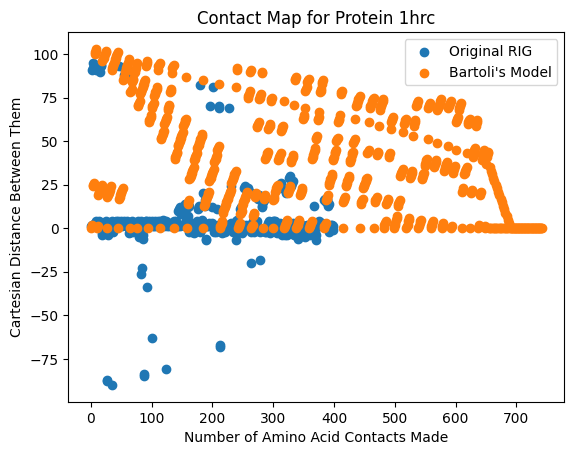

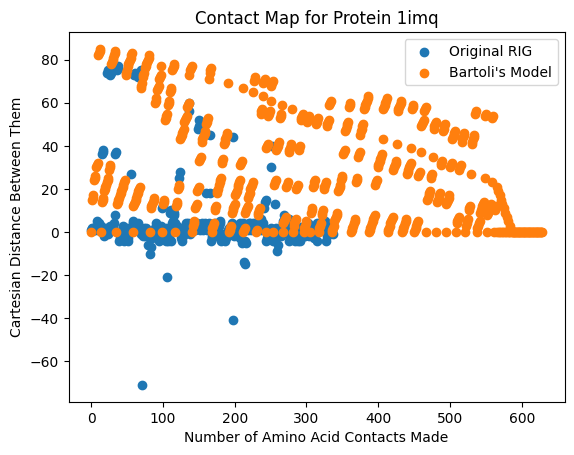

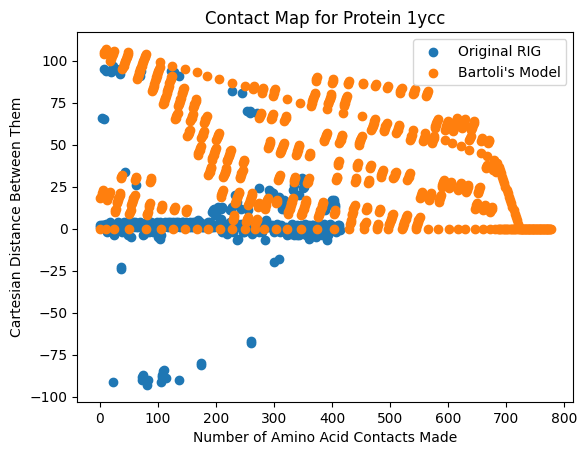

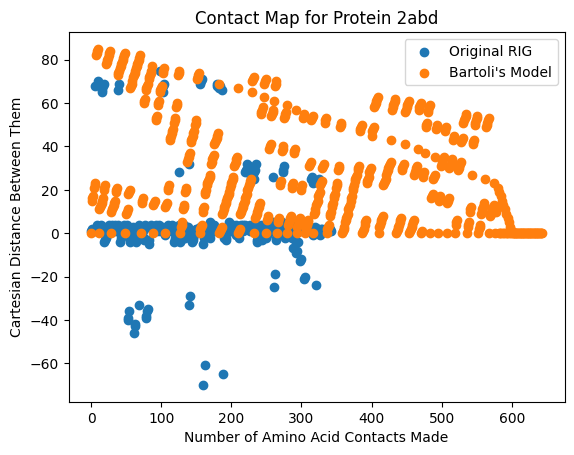

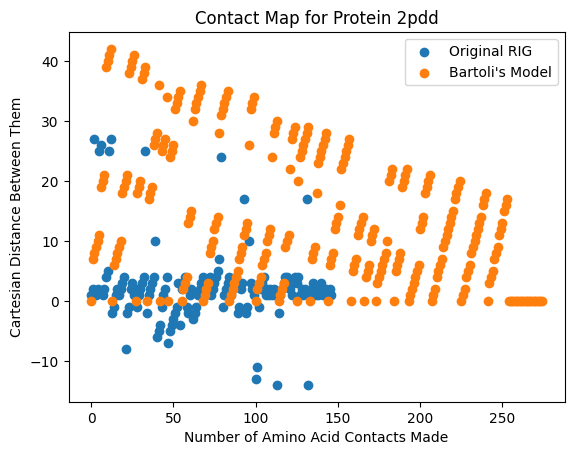

In [14]:
records_modified = []

for pdb_id in pdb_ids:

    rig_file_path = os.path.join(rig_folder, f"{pdb_id}_rig.adjlist")
    rig_model = nx.read_adjlist(rig_file_path)

    lin_file_path = os.path.join(lin_folder, f"{pdb_id}_lin.adjlist")
    lin_model = nx.read_adjlist(lin_file_path)
    
    coordinates = extract_coordinates(pdb_file)

    rig_L, rig_C = compute_network_properties(rig_model)

    lin_L, lin_C = compute_network_properties(lin_model)

    num_links_rig = len(rig_model.edges())
    bartoli_model = generate_bartoli_model_modified(rig_model, num_links_rig, coordinates)

    bartoli_graph = nx.Graph(bartoli_model)

    bartoli_L, bartoli_C = compute_network_properties(bartoli_graph)
    
    records_modified.append({
        'Protein': pdb_id,
        'RIG_L': rig_L,
        'RIG_C': rig_C,
        'LIN_L': lin_L,
        'LIN_C': lin_C,
        'Bartoli_L_modified': bartoli_L/2,
        'Bartoli_C_modified': bartoli_C/2
    })
    
    rig_edges = np.array([tuple(map(int, edge)) for edge in rig_model.edges()])
    bartoli_edges = np.array([tuple(map(int, edge)) for edge in bartoli_graph.edges()])
    plot_bartoli_model(rig_edges, bartoli_edges)

### Without modified Bartoli Model Results

In [15]:
results = pd.DataFrame.from_dict(records)
results

,Protein,RIG_L,RIG_C,LIN_L,LIN_C,Bartoli_L,Bartoli_C
0,1hrc,3.914862,0.566917,5.291667,0.022222,2.279500,0.155920
1,1imq,3.447606,0.580363,5.570571,0.000000,2.183858,0.209732
2,1ycc,4.025095,0.564257,3.390476,0.000000,2.273105,0.125922
3,2abd,3.708345,0.561989,6.627197,0.000000,2.129138,0.183898
4,2pdd,2.709856,0.596637,2.066667,0.000000,1.901440,0.291060


### Modified Bartoli Model Results
We see that the modified model generated results which have contact maps closer than that of the original model.

In [16]:
results_modified = pd.DataFrame.from_dict(records_modified)
results_modified

,Protein,RIG_L,RIG_C,LIN_L,LIN_C,Bartoli_L_modified,Bartoli_C_modified
0,1hrc,3.914862,0.566917,5.291667,0.022222,1.099608,0.112642
1,1imq,3.447606,0.580363,5.570571,0.000000,1.084131,0.124245
2,1ycc,4.025095,0.564257,3.390476,0.000000,1.128931,0.121265
3,2abd,3.708345,0.561989,6.627197,0.000000,1.070862,0.129680
4,2pdd,2.709856,0.596637,2.066667,0.000000,0.940199,0.208244


### Possibilities for the model to learn from contact maps:

1. **Simplicity and Intuition:**
   - The Bartoli model is straightforward and intuitive, making it accessible for understanding the basics of contact map generation.
   - The first two diagonals represent backbone contacts, capturing the proximity of sequential residues.

2. **Random Graph Generation:**
   - The model employs a random graph generation approach, which can provide a variety of possible contact maps for a given protein.

3. **Spatial Bias (Modified Model):**
   - The modified Bartoli model introduces a distance-dependent probability, attempting to mimic the spatial arrangements of residues in real protein structures.

### Limitations:

1. **Simplistic Representation:**
   - The model oversimplifies the complexity of protein structures by assuming a binary interaction (contact or no contact) between residues.

2. **Lack of Structural Context:**
   - The model does not consider the tertiary structure of proteins, including folding patterns, secondary structures, and solvent accessibility.

3. **Distance-Dependent Bias Challenges:**
   - Introducing a distance-dependent bias may not always align well with the actual structural properties of proteins. The relationship between spatial proximity and contact formation is intricate and protein-specific.

4. **Static Model:**
   - The Bartoli model generates static contact maps, whereas real protein structures are dynamic. It does not account for conformational changes or flexibility.

5. **Parameter Sensitivity:**
   - The performance of the model is sensitive to parameters such as the distance decay factor and may require careful tuning for different proteins.

6. **Limited Biological Insight:**
   - While the model generates contact maps, it may not provide deep insights into the biological significance of specific contacts, such as functional sites or interaction interfaces.

### Conclusion:

The Bartoli model and its modifications serve as introductory tools for understanding basic concepts of contact map generation. However, for more accurate and biologically relevant contact maps, advanced methods such as machine learning-based approaches, molecular dynamics simulations, or co-evolutionary analyses are often employed. These methods leverage additional structural and evolutionary information to improve the prediction of residue-residue contacts and provide a more realistic representation of protein structures.
